# 통신사 고객 데이터를 이용하여 이탈 고객 예측하기
- 통신사 고객의 특징을 포함하는 데이터를 수집
- 데이터를 파악하고 전처리 실시
- 고객의 특성을 나타내는 다양한 변수를 학습하고, 이탈여부(Churn)를 Yes 혹은  No로 판별
- Decision Tree 기법을 이용하여 이탈 고객을 분류하기
- 모델의 정확도 평가하기

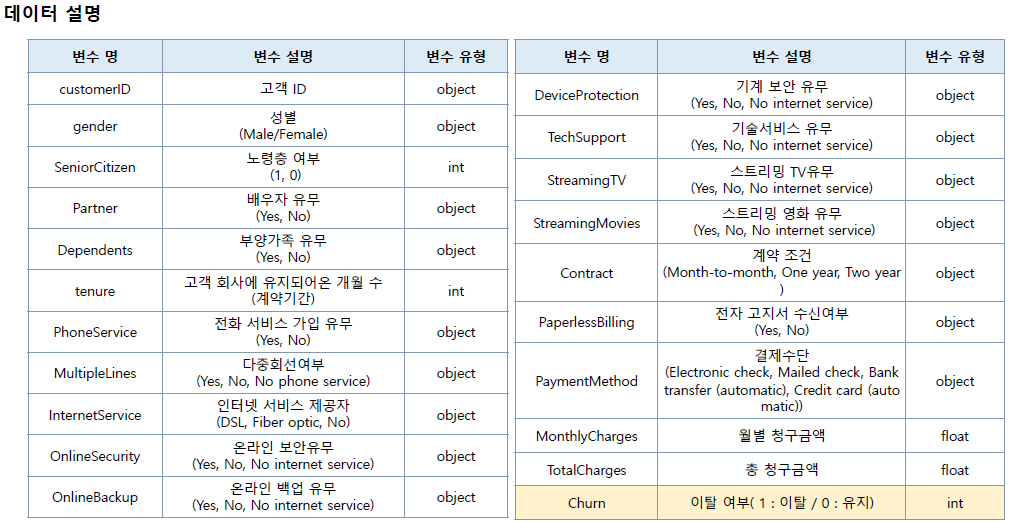

# 0. 데이터 불러오기

In [1]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8931-GJJIQ,Female,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.30,803.30,1
1,8808-ELEHO,Male,1,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.25,585.95,1
2,9253-QXKBE,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.45,2653.65,1
3,5016-ETTFF,Male,0,No,No,10,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,29.50,255.25,1
4,1820-DJFPH,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.05,1709.15,0


# 0-1. 데이터 분리하기
## 실제와 비슷한 상황을 만들기 위해 일부(20%)를 test_data로 취급하여 따로 분리해두고, 이 test_data를 활용하여 모델에 대한 성능을 확인한다

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2243 non-null   object 
 1   gender            2243 non-null   object 
 2   SeniorCitizen     2243 non-null   int64  
 3   Partner           2243 non-null   object 
 4   Dependents        2243 non-null   object 
 5   tenure            2243 non-null   int64  
 6   PhoneService      2243 non-null   object 
 7   MultipleLines     2243 non-null   object 
 8   InternetService   2243 non-null   object 
 9   OnlineSecurity    2243 non-null   object 
 10  OnlineBackup      2243 non-null   object 
 11  DeviceProtection  2243 non-null   object 
 12  TechSupport       2243 non-null   object 
 13  StreamingTV       2243 non-null   object 
 14  StreamingMovies   2243 non-null   object 
 15  Contract          2243 non-null   object 
 16  PaperlessBilling  2243 non-null   object 


### 데이터 중에 결측 데이터는 존재하지 않으므로 랜덤으로 20%의 test_data를 선정한다

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X=df.drop(columns=['Churn'])
Y=df['Churn']

X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=125)

In [4]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1547,4720-VSTSI,Female,0,No,No,44,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),84.80,3862.55
1818,8178-EYZUO,Male,0,No,No,46,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,93.70,4154.80
1758,6243-OZGFH,Female,0,No,No,23,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.95,996.85
676,0027-KWYKW,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95
108,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,214.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,8821-XNHVZ,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,80.05,80.05
1859,5835-BEQEU,Male,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.95,228.40
1279,6250-CGGUN,Male,0,No,No,54,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,No,Electronic check,84.40,4484.05
1250,0867-LDTTC,Male,0,No,No,5,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),75.15,392.65


### X_train과 y_train을 결합하여 모델 학습을 위한 데이터로 사용한다

In [7]:
import warnings 
warnings.filterwarnings('ignore')

train=X_train
train['Churn']=y_train
train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1547,4720-VSTSI,Female,0,No,No,44,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),84.80,3862.55,1
1818,8178-EYZUO,Male,0,No,No,46,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,93.70,4154.80,1
1758,6243-OZGFH,Female,0,No,No,23,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.95,996.85,0
676,0027-KWYKW,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95,0
108,4895-TMWIR,Male,1,Yes,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.95,214.75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,8821-XNHVZ,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,80.05,80.05,1
1859,5835-BEQEU,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.95,228.40,1
1279,6250-CGGUN,Male,0,No,No,54,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Electronic check,84.40,4484.05,0
1250,0867-LDTTC,Male,0,No,No,5,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),75.15,392.65,0


# 1. 데이터 탐색

In [9]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,1794.00000,1794.000000,1794.000000,1794.000000,1794.000000
mean,0.17893,27.731327,67.496739,2004.453763,0.487179
std,0.38340,23.861079,28.749036,2137.253449,0.499975
min,0.00000,1.000000,18.800000,19.000000,0.000000
25%,0.00000,5.000000,45.300000,279.250000,0.000000
50%,0.00000,22.000000,74.825000,1147.050000,0.000000
75%,0.00000,48.000000,90.000000,3119.100000,1.000000
max,1.00000,72.000000,118.600000,8425.300000,1.000000


### 이탈고객과 비이탈 고객의 비율파악

In [10]:
#라이브러리 호출
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Churn', ylabel='count'>

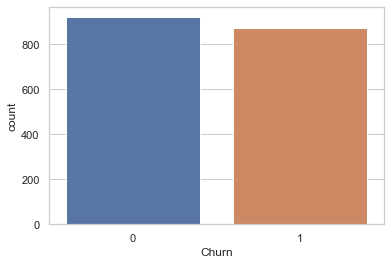

In [14]:
#그래프 그리기
sns.set(style="whitegrid")
sns.countplot(x="Churn", data=train)

#### 비슷함

### 성별에 따른 이탈 고객 차이

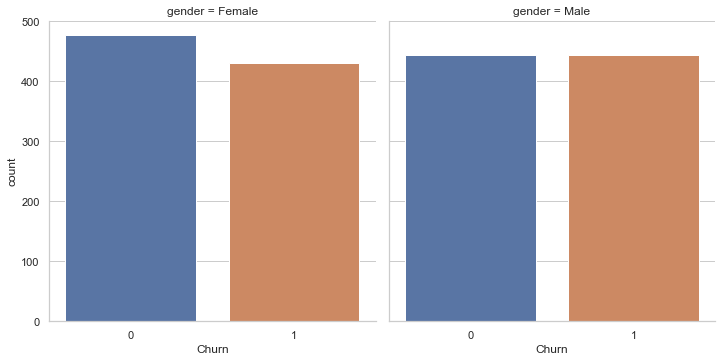

In [15]:
# 그래프 그리기
sns.catplot("Churn", col="gender", data=train, kind="count")

#### 여성에서 비이탈 고객의  count가 조금 더 높은 것을 볼 수 있다.

### 인터넷 서비스 제공 유무에 따른 이탈 고객 차이

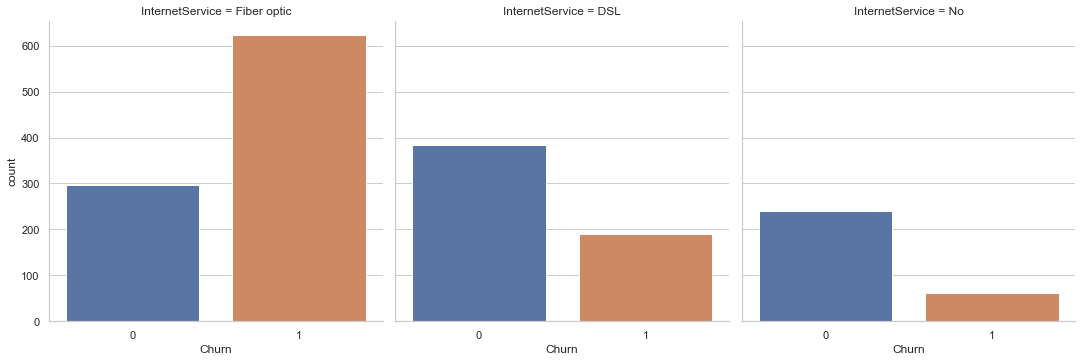

In [16]:
# 그래프 그리기
sns.catplot("Churn", col="InternetService", data=train, kind="count")

- 인터넷 서비스 = Fiber optic 일때 상당히 이탈 고객의  count가 높은것을 볼 수 있다. 
- 나머지 두 경우에서는(DSL과 NO) 비이탈고객의  count가 2~3배 높다는 것을 볼 수 있다.

### 온라인 백업 서비스 제공 유무에 따른 이탈 고객 차이

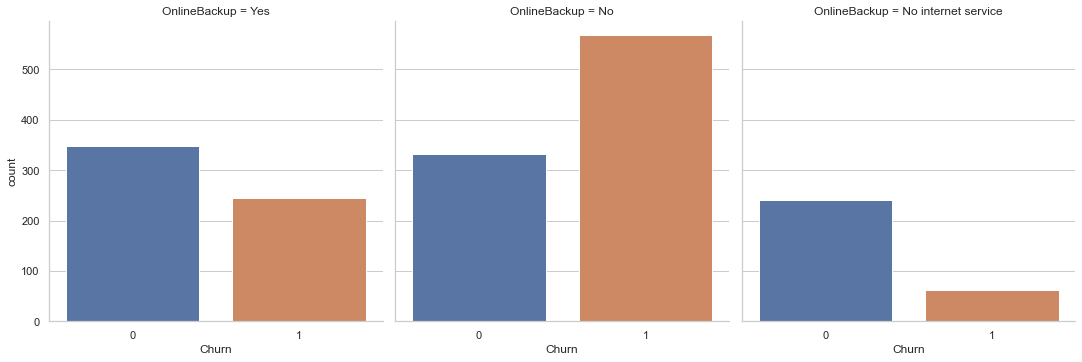

In [17]:
# 그래프 그리기
sns.catplot("Churn", col="OnlineBackup", data=train, kind="count")

####  온라인 백업 서비스 유무에 따라서 이탈고객  count의 차이가 상당함을 볼 수 있다.

### 기술 서비스 제공 유뮤에 따른 이탈 고객 차이


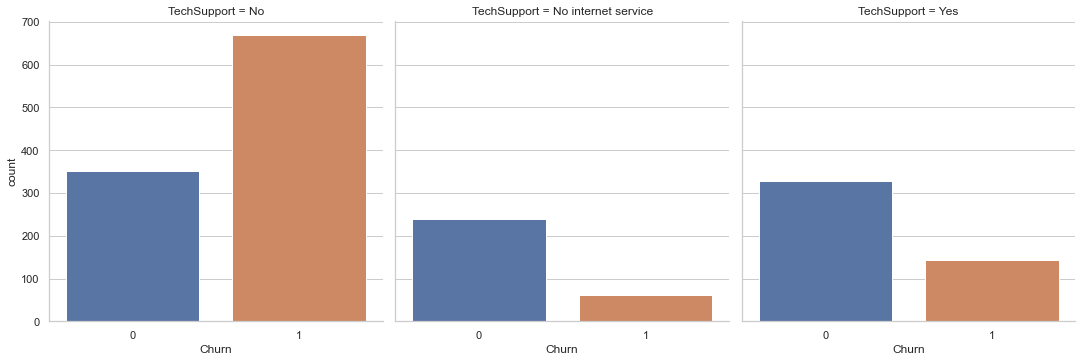

In [18]:
# 그래프 그리기
sns.catplot("Churn", col="TechSupport", data=train, kind="count")

#### TechSupport = No 인 경우에 이탈 고객의 count가 다른 경우보다 높은 것을 볼 수 있다.

## 각 case에 따른 이탈 고객의 비율

<AxesSubplot:xlabel='InternetService', ylabel='Churn'>

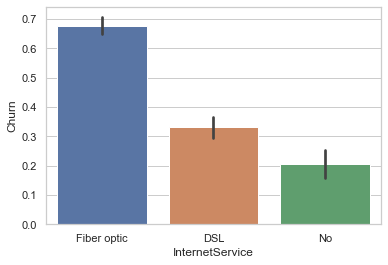

In [25]:
# 인터넷 서비스 제공 유무
sns.barplot(x = 'InternetService',y = 'Churn', data = train)

<AxesSubplot:xlabel='OnlineBackup', ylabel='Churn'>

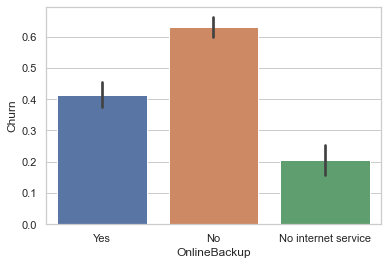

In [26]:
# 온라인 백업 유무
sns.barplot(x = 'OnlineBackup',y='Churn', data=train)

<AxesSubplot:xlabel='TechSupport', ylabel='Churn'>

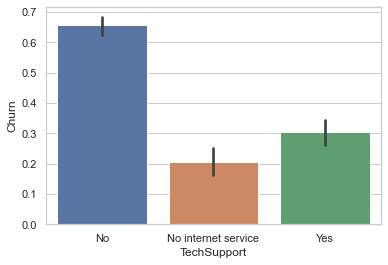

In [27]:
# 기술 서비스 유무
sns.barplot(x="TechSupport",y="Churn", data=train)

# 1-1. 박스 plot을 통해서 살펴본 변수간의 관계

### -연속형 변수의 경우에는 barplot을 통해서 예측변수와 설명변수의 관계를 볼 수 없다.
### -그러므로 예측변수의 경우에 따른 boxplot을 통해서 변수간의 관계를 살펴본다

### 계약기간에 따른 이탈 비율

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

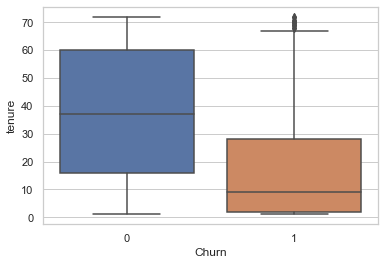

In [28]:
sns.boxplot(x='Churn',y='tenure',data=train)

#### 이탈 고객의 경우 비이탈 고객보다 계약기간이 짧았음을 알 수 있다.

### 월 납부액에 따른 이탈 비율


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

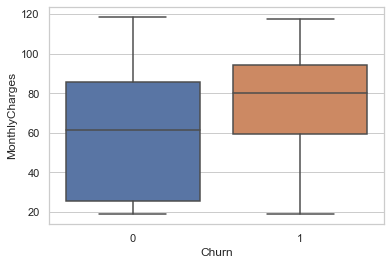

In [29]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=train)

#### 이탈 고객 중 월 납부액이 60 이하인 사람의 비율이 높지 않았음을 알 수 있다

### 총 납부액에 따른 이탈 비율

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

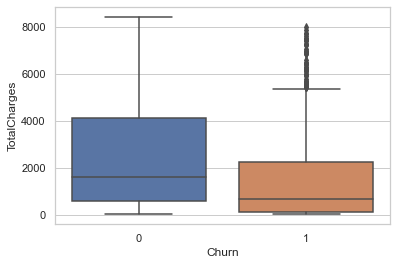

In [30]:
sns.boxplot(x='Churn',y='TotalCharges',data=train)

#### 이탈 고객의 경우 총 납부액이 낮았음을 알 수 있다.
- 위의 결과와 함께 고려해보면 월 납부액이 높은 사람중에 이탈 고객이 많으나, 대부분 계약기간이 길지 않았기에 오히려 총 납부액은 이탈 고객의 경우가 더 낮음을 알 수 있다.

# 1-2. 상관관계 분석
### 계약기간, 월 납부액, 총 납부액 간의 상관관계 알아보기

In [34]:
# 함수 이용하여 파악하기
train_new = train[['tenure','MonthlyCharges','TotalCharges']]
train_cor=train_new.corr()
train_cor

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.195010,0.854994
MonthlyCharges,0.195010,1.000000,0.564424
TotalCharges,0.854994,0.564424,1.000000


(3.0, 0.0)

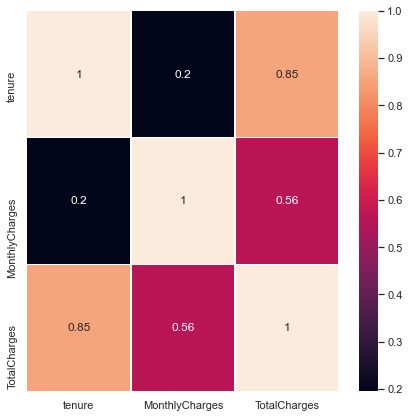

In [35]:
# 시각화해서 살펴보기
plt.figure(figsize=(7,7))

corr_plot = sns.heatmap(data = train_new.corr(), annot=True, linewidths=.5)
corr_plot.set_ylim(3,0)

# 데이터 전처리

In [37]:
# 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1794 entries, 1547 to 2205
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1794 non-null   object 
 1   gender            1794 non-null   object 
 2   SeniorCitizen     1794 non-null   int64  
 3   Partner           1794 non-null   object 
 4   Dependents        1794 non-null   object 
 5   tenure            1794 non-null   int64  
 6   PhoneService      1794 non-null   object 
 7   MultipleLines     1794 non-null   object 
 8   InternetService   1794 non-null   object 
 9   OnlineSecurity    1794 non-null   object 
 10  OnlineBackup      1794 non-null   object 
 11  DeviceProtection  1794 non-null   object 
 12  TechSupport       1794 non-null   object 
 13  StreamingTV       1794 non-null   object 
 14  StreamingMovies   1794 non-null   object 
 15  Contract          1794 non-null   object 
 16  PaperlessBilling  1794 non-null   objec

## 이상치 확인

Text(0.5, 0, 'tenure')

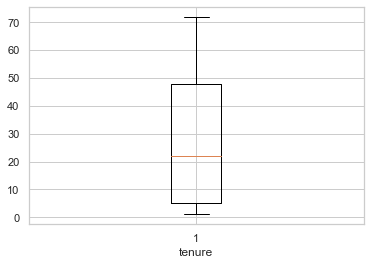

In [38]:
import matplotlib.pyplot as plt

plt.boxplot(train['tenure'])
plt.xlabel('tenure')

Text(0.5, 0, 'MonthlyCharges')

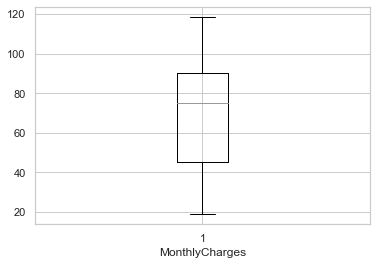

In [39]:
plt.boxplot(train['MonthlyCharges'])
plt.xlabel('MonthlyCharges')

Text(0.5, 0, 'TotalCharges')

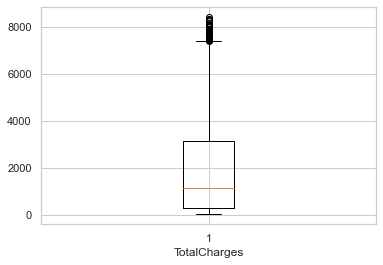

In [40]:
plt.boxplot(train['TotalCharges'])
plt.xlabel('TotalCharges')

## 변수 선택
- 위의 EDA과정에서는 target변수(Churn)과 관련있는 변수들을 확인.
- 필요한 변수만 사용


(인터넷 서비스, 온라인 백업, 기술서비스 유무, 계약기간, 월납입금, 총 납입금)

In [41]:
train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
train_X=train[['tenure','InternetService','OnlineBackup','TechSupport','MonthlyCharges','TotalCharges']]
train_Y=train['Churn']

In [47]:
train_X

,tenure,InternetService,OnlineBackup,TechSupport,MonthlyCharges,TotalCharges
1547,44,Fiber optic,Yes,No,84.80,3862.55
1818,46,Fiber optic,Yes,No,93.70,4154.80
1758,23,DSL,No,No,44.95,996.85
676,23,Fiber optic,No,No,83.75,1849.95
108,11,No,No internet service,No internet service,19.95,214.75
...,...,...,...,...,...,...
1646,1,Fiber optic,No,No,80.05,80.05
1859,3,Fiber optic,No,No,76.95,228.40
1279,54,Fiber optic,No,Yes,84.40,4484.05
1250,5,DSL,No,Yes,75.15,392.65


## 범주형 변수 처리 (원-핫 인코딩 = 더미화)

### 범주형 변수인 인터넷 서비스, 온라인 백업, 기술서비스 를 숫자형으로 전환해줘야 한다. 
### 따로 숫자적인 의미가 존재하지 않으므로 label encoding이 아닌 One-Hot encoding을 사용한다.

In [48]:
train_X=pd.get_dummies(train_X)
train_X

,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
1547,44,84.80,3862.55,0,1,0,0,0,1,1,0,0
1818,46,93.70,4154.80,0,1,0,0,0,1,1,0,0
1758,23,44.95,996.85,1,0,0,1,0,0,1,0,0
676,23,83.75,1849.95,0,1,0,1,0,0,1,0,0
108,11,19.95,214.75,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1646,1,80.05,80.05,0,1,0,1,0,0,1,0,0
1859,3,76.95,228.40,0,1,0,1,0,0,1,0,0
1279,54,84.40,4484.05,0,1,0,1,0,0,0,0,1
1250,5,75.15,392.65,1,0,0,1,0,0,0,0,1


# 3. 모델학습
## 의사결정나무를 활용하여 모델학습을 해본다

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model=DecisionTreeClassifier()
model=model.fit(train_X,train_Y)

# 4. 예측
## fitting된 모델을 사용하여 test데이터에서 어느정도의 성능을 보이는지 살펴본다


### test_data 전처리
- test데이터는 처음 주어진 기존의 형태를 유지하고 있는 데이터이다. 
- 예측에 이용하기 위해서는 train_X와 동일한 형태가 되도록 데이터를 변환해주어야 한다.

In [51]:
test_X=X_test[['tenure','InternetService','OnlineBackup','TechSupport','MonthlyCharges','TotalCharges']]

In [52]:
test_X=pd.get_dummies(test_X)
test_X

,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
1304,47,70.55,3309.25,0,1,0,1,0,0,1,0,0
674,9,85.35,754.65,0,1,0,1,0,0,1,0,0
1328,2,18.75,53.15,0,0,1,0,1,0,0,1,0
1274,1,19.30,19.30,0,0,1,0,1,0,0,1,0
1112,2,20.10,39.80,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1886,15,20.00,288.05,0,0,1,0,1,0,0,1,0
476,33,73.90,2405.05,1,0,0,1,0,0,0,0,1
2102,5,94.45,498.10,0,1,0,1,0,0,1,0,0
985,55,44.85,2479.05,1,0,0,0,0,1,1,0,0


#### train과 test가 동일한 column을 가지고 있는지 확인

In [54]:
train_X.columns==test_X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

## 예측

In [55]:
pred=model.predict(test_X)

## 성능평가(정확도)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,pred)

0.7884187082405345

## 약 79%의 정확도를 보인다

# 5. 하이퍼 파라미터 튜닝

- ### 위의 모델링은 기본 하이퍼 파라미터를 가지고 모델링을 한 결과이다.
- ### 충분히 train데이터에 과적합 됐을수도 있다. 
- ### 그러므로 CV를 통해서 하이퍼 파라미터 튜닝을 한 뒤에 best_hyperparameter로 다시 모델링을 해보고 결과를 비교한다

## CV는 GridSearchCV를 사용해서 진행한다

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
dtree=DecisionTreeClassifier()

In [92]:
grid_parameters={'max_depth':[1,3,5,7,9,13,15,17,21],
                'min_samples_split':[2,3,4,5,7,10]}

In [93]:
# cv=5로 진행
grid_dtree=GridSearchCV(dtree,param_grid=grid_parameters,cv=5,refit=True)

### 학습

In [94]:
grid_dtree.fit(train_X,train_Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 13, 15, 17, 21],
                         'min_samples_split': [2, 3, 4, 5, 7, 10]})

In [95]:
# GridSearchCV  결과를 추출해 DataFrame으로 변환
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002181,4.055503e-04,0.001011,1.939760e-05,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
1,0.002776,1.149954e-03,0.001204,3.963624e-04,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
2,0.001979,6.146463e-04,0.001008,3.177038e-05,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
3,0.001405,4.802622e-04,0.000993,8.034954e-06,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
4,0.001994,5.091228e-07,0.000797,3.985406e-04,1,7,"{'max_depth': 1, 'min_samples_split': 7}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
5,0.002191,3.984257e-04,0.000998,1.736368e-06,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.688022,0.646240,0.690808,0.699164,0.650838,0.675014,0.021974,49
6,0.002195,3.971391e-04,0.000794,3.972603e-04,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.740947,0.715877,0.749304,0.746518,0.717877,0.734105,0.014335,43
7,0.002222,4.210461e-04,0.001181,3.692635e-04,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.740947,0.715877,0.749304,0.746518,0.717877,0.734105,0.014335,43
8,0.002405,4.811822e-04,0.000784,3.931279e-04,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.740947,0.715877,0.749304,0.746518,0.717877,0.734105,0.014335,43
9,0.002396,4.906628e-04,0.000992,6.096433e-06,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.740947,0.715877,0.749304,0.746518,0.717877,0.734105,0.014335,43


In [96]:
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.675014,49,0.688022,0.646240,0.690808,0.699164,0.650838
1,"{'max_depth': 1, 'min_samples_split': 3}",0.675014,49,0.688022,0.646240,0.690808,0.699164,0.650838
2,"{'max_depth': 1, 'min_samples_split': 4}",0.675014,49,0.688022,0.646240,0.690808,0.699164,0.650838
3,"{'max_depth': 1, 'min_samples_split': 5}",0.675014,49,0.688022,0.646240,0.690808,0.699164,0.650838
4,"{'max_depth': 1, 'min_samples_split': 7}",0.675014,49,0.688022,0.646240,0.690808,0.699164,0.650838
5,"{'max_depth': 1, 'min_samples_split': 10}",0.675014,49,0.688022,0.646240,0.690808,0.699164,0.650838
6,"{'max_depth': 3, 'min_samples_split': 2}",0.734105,43,0.740947,0.715877,0.749304,0.746518,0.717877
7,"{'max_depth': 3, 'min_samples_split': 3}",0.734105,43,0.740947,0.715877,0.749304,0.746518,0.717877
8,"{'max_depth': 3, 'min_samples_split': 4}",0.734105,43,0.740947,0.715877,0.749304,0.746518,0.717877
9,"{'max_depth': 3, 'min_samples_split': 5}",0.734105,43,0.740947,0.715877,0.749304,0.746518,0.717877


In [97]:
import numpy as np
print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:',np.round(grid_dtree.best_score_,5))

GridSearchCV 최적 파라미터: {'max_depth': 21, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.78261


## 최적 하이퍼 파라미터를 활용한 예측

In [100]:
best_tree=DecisionTreeClassifier(max_depth=21)
best_tree=best_tree.fit(train_X,train_Y)

In [101]:
pred_best=best_tree.predict(test_X)

In [102]:
accuracy_score(y_test,pred_best)

0.7928730512249443